# Preparação da base em parquet

Para ter mais velocidade de processamento


Conectando com google



In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


Importando bibliotecas

In [25]:
from tensorflow.keras.models import Sequential

In [30]:
from tensorflow.keras.layers import LSTM, Dropout, Dense

In [14]:
import pandas as pd
import pyarrow.parquet as pq
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.preprocessing import LabelEncoder


Importando DF

In [3]:
#Carregando dataframe
df = pd.read_csv('/content/drive/MyDrive/train_transaction.csv')

df.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
df.to_parquet('/content/drive/MyDrive/train_transaction.parquet')

# Pré processamento

In [5]:
df = pd.read_parquet('/content/drive/MyDrive/train_transaction.parquet')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590540 entries, 0 to 590539
Columns: 394 entries, TransactionID to V339
dtypes: float64(376), int64(4), object(14)
memory usage: 1.7+ GB


In [7]:
df.describe()

,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
count,5.905400e+05,590540.000000,5.905400e+05,590540.000000,590540.000000,581607.000000,588975.000000,586281.000000,524834.000000,524834.000000,...,82351.000000,82351.000000,82351.000000,82351.000000,82351.000000,82351.00000,82351.000000,82351.000000,82351.000000,82351.000000
mean,3.282270e+06,0.034990,7.372311e+06,135.027176,9898.734658,362.555488,153.194925,199.278897,290.733794,86.800630,...,0.775874,721.741883,1375.783644,1014.622782,9.807015,59.16455,28.530903,55.352422,151.160542,100.700882
std,1.704744e+05,0.183755,4.617224e+06,239.162522,4901.170153,157.793246,11.336444,41.244453,101.741072,2.690623,...,4.727971,6217.223583,11169.275702,7955.735482,243.861391,387.62948,274.576920,668.486833,1095.034387,814.946722
min,2.987000e+06,0.000000,8.640000e+04,0.251000,1000.000000,100.000000,100.000000,100.000000,100.000000,10.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,3.134635e+06,0.000000,3.027058e+06,43.321000,6019.000000,214.000000,150.000000,166.000000,204.000000,87.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,3.282270e+06,0.000000,7.306528e+06,68.769000,9678.000000,361.000000,150.000000,226.000000,299.000000,87.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
75%,3.429904e+06,0.000000,1.124662e+07,125.000000,14184.000000,512.000000,150.000000,226.000000,330.000000,87.000000,...,0.000000,0.000000,25.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
max,3.577539e+06,1.000000,1.581113e+07,31937.391000,18396.000000,600.000000,231.000000,237.000000,540.000000,102.000000,...,55.000000,160000.000000,160000.000000,160000.000000,55125.000000,55125.00000,55125.000000,104060.000000,104060.000000,104060.000000


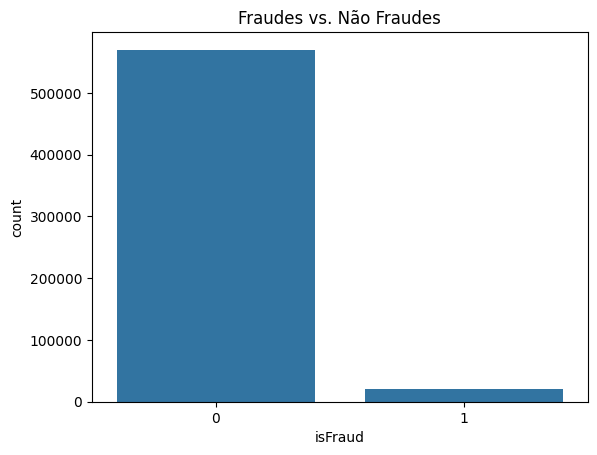

In [10]:
# Fraude vs. não fraude
sns.countplot(x='isFraud', data=df)
plt.title('Fraudes vs. Não Fraudes')
plt.show()

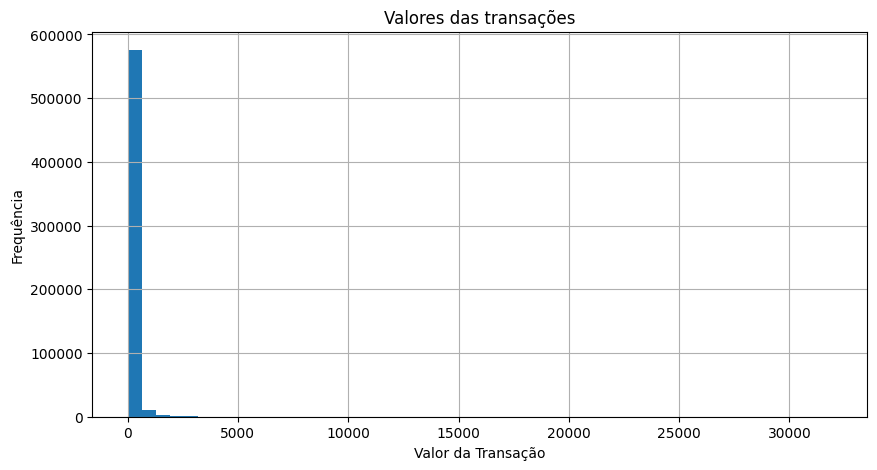

In [11]:
df['TransactionAmt'].hist(bins=50, figsize=(10,5))
plt.title('Valores das transações')
plt.xlabel('Valor da Transação')
plt.ylabel('Frequência')
plt.show()

In [12]:
categorical_columns = df.select_dtypes(include=['object']).columns
print(categorical_columns)

Index(['ProductCD', 'card4', 'card6', 'P_emaildomain', 'R_emaildomain', 'M1',
       'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9'],
      dtype='object')


In [15]:
labelencoder = LabelEncoder()
for col in categorical_columns:
    df[col] = labelencoder.fit_transform(df[col].astype(str))

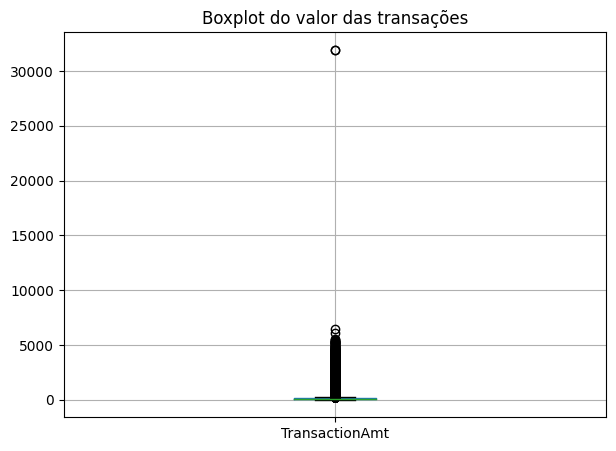

In [16]:
df.boxplot(column=['TransactionAmt'], figsize=(7,5))
plt.title('Valor das transações')
plt.show()

In [17]:
df.fillna(df.median(), inplace=True)
df.fillna(df.mode().iloc[0], inplace=True)

In [18]:
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)

In [19]:
df.to_parquet('/content/drive/MyDrive/train_transaction_encoded.parquet')

In [20]:
df = pd.read_parquet('/content/drive/MyDrive/train_transaction_encoded.parquet')

In [21]:
# Definindo LSTM
seq_length = 10

# Função que gera as sequencias
def sequence_generator(data, labels, seq_length, batch_size):
    data_len = len(data)
    while True:
        for start in range(0, data_len - seq_length, batch_size):
            X_batch = []
            y_batch = []
            for i in range(start, min(start + batch_size, data_len - seq_length)):
                X_batch.append(data[i:i+seq_length])
                y_batch.append(labels[i + seq_length])
            yield np.array(X_batch), np.array(y_batch)

# Definição do batch size
batch_size = 64

train_gen = sequence_generator(df_scaled, df['isFraud'], seq_length, batch_size)

X_batch, y_batch = next(train_gen)

print("X_batch shape:", X_batch.shape)
print("y_batch shape:", y_batch.shape)

X_batch shape: (64, 10, 394)
y_batch shape: (64,)


In [31]:
n_features = df_scaled.shape[1]  # Número de colunas

model = Sequential()

model.add(LSTM(units=50, return_sequences=True, input_shape=(seq_length, n_features)))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])



/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [41]:
steps_per_epoch = len(df_scaled) // batch_size

# Treinando o modelo
history = model.fit(train_gen, steps_per_epoch=steps_per_epoch, epochs=3)

Epoch 1/3
9227/9227 ━━━━━━━━━━━━━━━━━━━━ 330s 36ms/step - accuracy: 0.9617 - loss: 0.1563
Epoch 2/3
9227/9227 ━━━━━━━━━━━━━━━━━━━━ 243s 26ms/step - accuracy: 0.9617 - loss: 0.1560
Epoch 3/3
9227/9227 ━━━━━━━━━━━━━━━━━━━━ 240s 26ms/step - accuracy: 0.9617 - loss: 0.1558


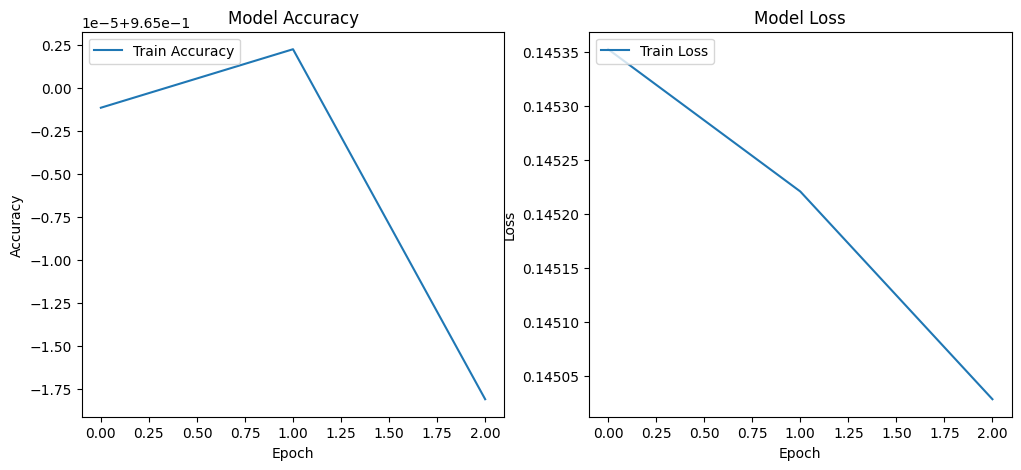

In [43]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

plt.show()

# Detecção de Fraudes com LSTM - Dataset IEEE-CIS

## 1. Preparação dos Dados

- **Imputação de valores ausentes**: Mediana para variáveis numéricas e moda para categóricas.
- **Codificação de variáveis categóricas**: LabelEncoder para variáveis como `ProductCD` e `card4`.
- **Normalização**: MinMaxScaler para escalar variáveis numéricas no intervalo [0,1].

## 2. Arquitetura do Modelo

- **LSTM**:
  - Camada LSTM 1: 50 neurônios, `return_sequences=True`.
  - Dropout: 20%.
  - Camada LSTM 2: 50 neurônios, `return_sequences=False`.
  - Dropout: 20%.
  - Camada de saída: 1 neurônio (sigmoid) para classificação de fraude.

## 3. Treinamento

- **Gerador de sequências** para lidar com grandes volumes de dados.
- Treinamento por 3 épocas com batch size de 64.

## 4. Avaliação

- **Métricas**: Loss e Acurácia.

## 5. Mitigação de Overfitting

- **Estratégias**:
  - Aumento do Dropout.
  - Regularização L2.
  - Redução do número de neurônios.

## 6. Conclusão

- **Desempenho**: Apesar da redução na função de perda, os resultados indicam que o modelo não está aprendendo corretamente a distinguir fraudes das não fraudes.

Algumas das causas podem ser:
- O modelo pode não estar sendo treinado por tempo suficiente para aprender padrões complexos nos dados.

- O número de épocas, taxa de aprendizado ou o número de neurônios e camadas pode estar impactando negativamente o aprendizado.

- A aplicação de oversampling, undersampling ou ajuste de pesos ajudaria a lidar melhor com o desequilíbrio entre fraudes e não fraudes.

**Melhorias Futuras**:
- Ajustar os hiperparâmetros: Aumentar o número de épocas e rever a taxa de aprendizado.
- Aumentar a regularização: Considerar o uso de camadas adicionais de Dropout ou Regularização L2 para evitar que o modelo se ajuste aos ruídos dos dados de treinamento.
- Melhorar o balanceamento de classes: Reavaliar o balanceamento das classes de fraude e não fraude, utilizando técnicas como SMOTE, para garantir que o modelo esteja aprendendo igualmente bem sobre ambas as classes.
